In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici

In [2]:
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    return c2-c1

In [3]:
N=2*1000

In [4]:
taus=np.fft.fftfreq(N)*N
print(taus)
f2=0.5
f1=0.05
print(f1*N,f2*N)
acf1=get_acf(taus[1:],f1,f2)

[ 0.  1.  2. ... -3. -2. -1.]
100.0 1000.0


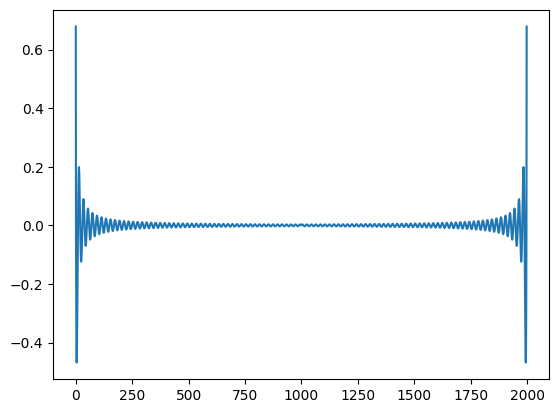

In [5]:
plt.plot(acf1)
# plt.xlim(0,10)

In [34]:
acf1[N//2]

9.847037647328078e-05

In [109]:
taus2=np.linspace(0,N//2,N//2*10+1)

In [116]:
acf2=get_acf(taus2[1:],f1,f2)
acf2=np.hstack([10*np.log(f2/f1),10*acf2])

(0.0, 10.0)

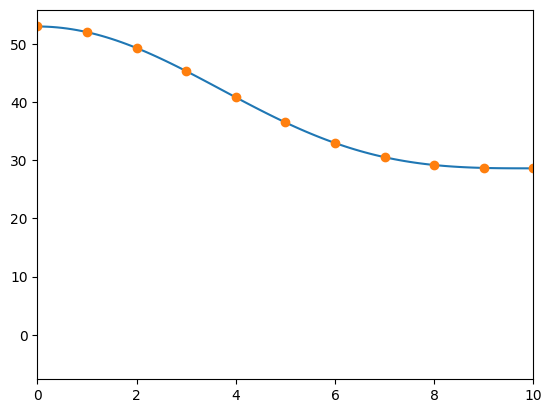

In [124]:
plt.plot(taus2[:N//2],acf2[:N//2])
plt.plot(taus[:N//2],acf1[:N//2],'o')
plt.xlim(0,10)

In [8]:
acf1=np.hstack([np.log(f2/f1),acf1])

In [9]:
acf1

array([4.60517019, 4.58059989, 4.50809333, ..., 4.39118487, 4.50809333,
       4.58059989])

In [34]:
ps=np.fft.rfft(acf1-np.mean(acf1))

In [31]:
acf1

array([4.60517019, 4.58059989, 4.50809333, ..., 4.39118487, 4.50809333,
       4.58059989])

In [37]:
ps[1]

(-2.0263004879710125-6.267477991673057e-15j)

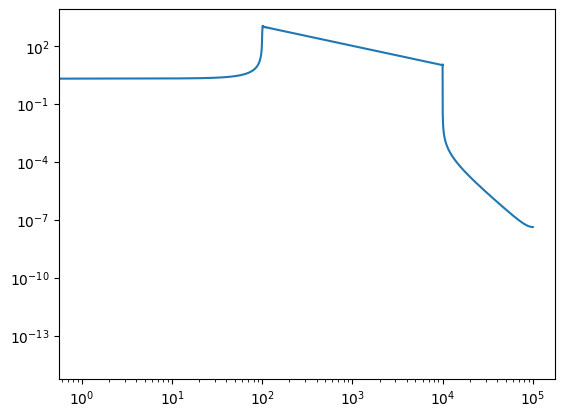

In [36]:
plt.loglog(np.abs(ps))

In [35]:
f1*N, f2*N

(1000.0, 10000.0)

In [38]:
ps=np.zeros(N//2+1,dtype='complex128')
ps[int(f1*N):int(f2*N)+1]=1/np.arange(int(f1*N),int(f2*N)+1)
acf_dft=np.fft.irfft(ps)

In [40]:
amp = acf_dft[:N//2]@acf1[:N//2]/acf_dft[:N//2]@acf_dft[:N//2]

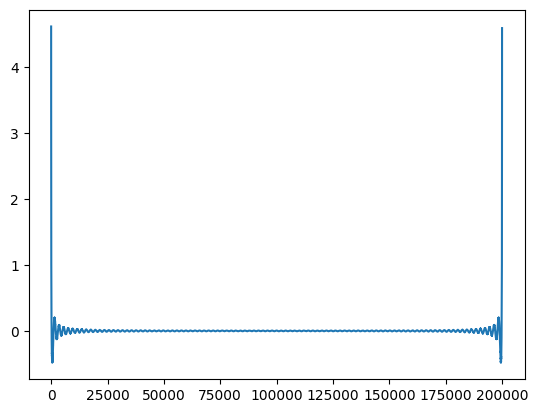

In [53]:
plt.plot(acf_dft*N/2)

(0.0, 1000.0)

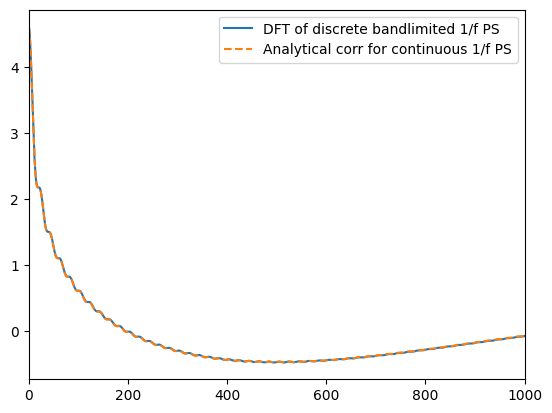

In [56]:
plt.plot(acf_dft*N/2, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf1,ls='--', label='Analytical corr for continuous 1/f PS')
plt.legend()
plt.xlim(0,1000)

(0.0, 1000.0)

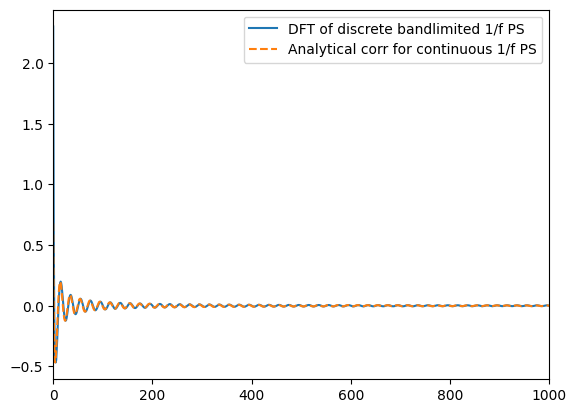

In [39]:
plt.plot(acf_dft*N/2, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf1,ls='--', label='Analytical corr for continuous 1/f PS')
plt.legend()
plt.xlim(0,1000)

In [54]:
acf_dft*N/2

array([4.61022852, 4.58565575, 4.51314201, ..., 4.39622237, 4.51314201,
       4.58565575])

In [55]:
acf1

array([4.60517019, 4.58059989, 4.50809333, ..., 4.39118487, 4.50809333,
       4.58059989])